To understand what makes a filter high or low-pass (Sobel filter high-pass and Gaussian filter low-pass) Fourier Transform can be used. The frequencies that these filters block out can be visualized by looking at their FT. An FT looks at the componenets of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. (To observe filters will be treated as small images, displayed in the frequency domain.)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define Gaussian, Sobel, and Laplacian (Edge) Filters respectively

gaussian = (1/9)*np.array([[1, 1, 1],
                         [1, 1, 1],
                         [1, 1, 1]])

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]

filter_name = ['gaussian', 'sobel_x', 'sobel_y', 'laplacian']

In [3]:
# Perform a fast fourier transform on each filter
# Create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

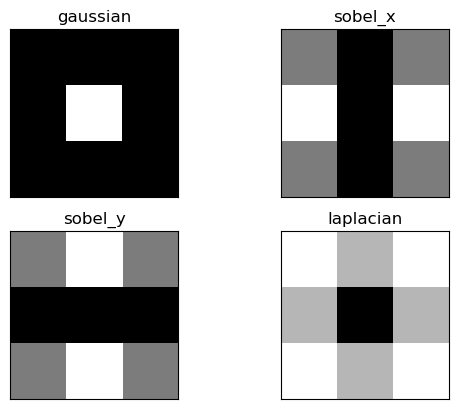

In [4]:
# Display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1), plt.imshow(frequency_tx[i], cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through. Areas of black mean that part of the spectrum is blocked out of the image. 

The low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (all edge, regardless of orientation) filter, should block out low-frequencies.

You are encouraged to load in an image, apply a filter to it using `filter2d` then visualize what the fourier transform of that image looks like before and after a filter is applied.